In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

from io import StringIO

requests.packages.urllib3.disable_warnings()

url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/"\
      "resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
response = requests.get(url, verify=False)
content = response.content.decode('utf-8')

df = pd.read_csv(StringIO(content), sep=';')
# df = pd.read_csv("VendasTesouroDireto.csv", sep=';')

In [30]:
print(df.columns)
df.head()

Index(['Tipo Titulo', 'Vencimento do Titulo', 'Data Venda', 'PU', 'Quantidade',
       'Valor'],
      dtype='object')


,Tipo Titulo,Vencimento do Titulo,Data Venda,PU,Quantidade,Valor
0,Tesouro IGPM+ com Juros Semestrais,01/07/2005,07/01/2002,"1038,150000","7,40","7682,31"
1,Tesouro Selic,16/02/2005,07/01/2002,"1258,200000","0,20","251,64"
2,Tesouro Selic,17/01/2007,07/01/2002,"1245,900000","9,20","11462,28"
3,Tesouro Selic,21/01/2004,07/01/2002,"1263,007692","2,60","3283,81"
4,Tesouro Selic,18/01/2006,07/01/2002,"1252,950000","0,20","250,59"


In [31]:
df.rename(columns={
    'Tipo Titulo': 'TIPO_TITULO',
    'Vencimento do Titulo': 'VENCIMENTO_DO_TITULO',
    'Data Venda': 'DATA_VENDA',
    'Quantidade': 'QUANTIDADE'
}, inplace=True)
df['DATA_VENDA'] = pd.to_datetime(df['DATA_VENDA'], format='%d/%m/%Y')
df['PU'].replace([','], '.', regex=True, inplace=True)
df['PU'] = pd.to_numeric(df['PU'])
df['QUANTIDADE'].replace([','], '.', regex=True, inplace=True)
df['QUANTIDADE'] = pd.to_numeric(df['QUANTIDADE'])
df.head()

,TIPO_TITULO,VENCIMENTO_DO_TITULO,DATA_VENDA,PU,QUANTIDADE,Valor
0,Tesouro IGPM+ com Juros Semestrais,01/07/2005,2002-01-07,1038.150000,7.4,"7682,31"
1,Tesouro Selic,16/02/2005,2002-01-07,1258.200000,0.2,"251,64"
2,Tesouro Selic,17/01/2007,2002-01-07,1245.900000,9.2,"11462,28"
3,Tesouro Selic,21/01/2004,2002-01-07,1263.007692,2.6,"3283,81"
4,Tesouro Selic,18/01/2006,2002-01-07,1252.950000,0.2,"250,59"


In [32]:
df.query('TIPO_TITULO == "Tesouro Selic"', inplace=True)
df.sort_values('DATA_VENDA', ascending=True, inplace=True)
df.head()

,TIPO_TITULO,VENCIMENTO_DO_TITULO,DATA_VENDA,PU,QUANTIDADE,Valor
1,Tesouro Selic,16/02/2005,2002-01-07,1258.200000,0.2,"251,64"
2,Tesouro Selic,17/01/2007,2002-01-07,1245.900000,9.2,"11462,28"
3,Tesouro Selic,21/01/2004,2002-01-07,1263.007692,2.6,"3283,81"
4,Tesouro Selic,18/01/2006,2002-01-07,1252.950000,0.2,"250,59"
10,Tesouro Selic,16/02/2005,2002-01-08,1259.109920,25.2,"31729,56"


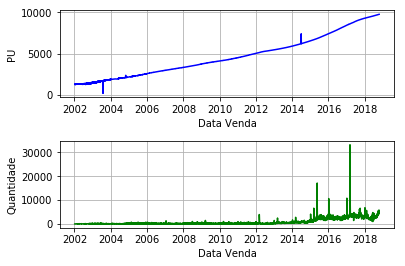

In [33]:
time = df['DATA_VENDA']
pu = df['PU']
quantity = df['QUANTIDADE']

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.5)

ax1.plot(time, pu, 'b')
ax1.set_xlabel('Data Venda')
ax1.set_ylabel('PU')
ax1.grid(True)

ax2.plot(time, quantity, 'g')
ax2.set_xlabel('Data Venda')
ax2.set_ylabel('Quantidade')
ax2.grid(True)

plt.show()